In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

d:\llm_book\py_p1\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\anuto\.cache\kagglehub\datasets\dylanjcastillo\7k-books-with-metadata\versions\3


In [2]:
import pandas as pd
books=pd.read_csv("books.csv")

In [3]:
books.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [4]:
books.info()
books.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


,isbn13,published_year,average_rating,num_pages,ratings_count
count,6.810000e+03,6804.000000,6767.000000,6767.000000,6.767000e+03
mean,9.780677e+12,1998.630364,3.933284,348.181026,2.106910e+04
std,6.068911e+08,10.484257,0.331352,242.376783,1.376207e+05
min,9.780002e+12,1853.000000,0.000000,0.000000,0.000000e+00
25%,9.780330e+12,1996.000000,3.770000,208.000000,1.590000e+02
50%,9.780553e+12,2002.000000,3.960000,304.000000,1.018000e+03
75%,9.780810e+12,2005.000000,4.130000,420.000000,5.992500e+03
max,9.789042e+12,2019.000000,5.000000,3342.000000,5.629932e+06


In [5]:
books.isnull().sum()

isbn13               0
isbn10               0
title                0
subtitle          4429
authors             72
categories          99
thumbnail          329
description        262
published_year       6
average_rating      43
num_pages           43
ratings_count       43
dtype: int64

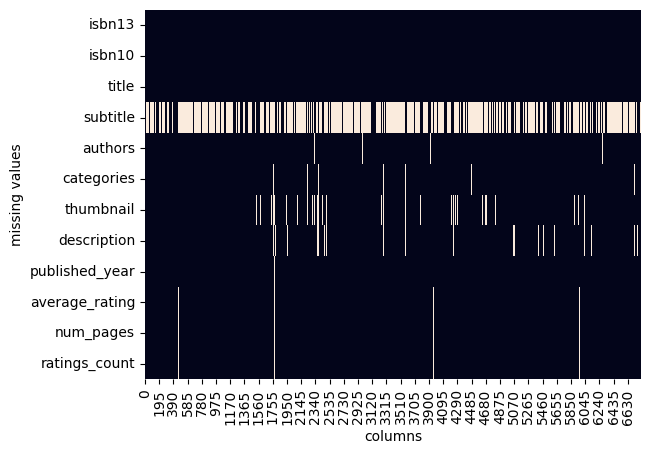

In [12]:
import seaborn as sns 
import matplotlib.pyplot as plt
ax=plt.axes()
sns.heatmap(books.isna().transpose(),cbar=False,ax=ax)
plt.xlabel("columns")
plt.ylabel("missing values")
plt.show()

In [ ]:
import numpy as np
books["missing_desc"]= np.where(books["description"].isna(),1,0)
books["age_of_book"]=2024-books["published_year"]


Text(0.5, 1.0, 'Correlation Matrix')

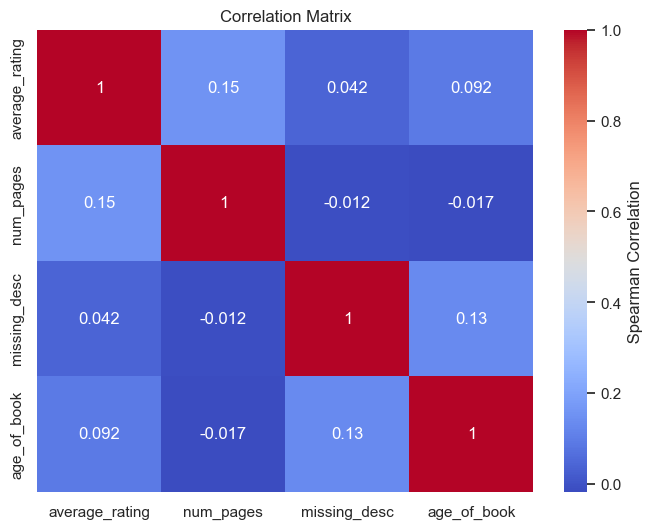

In [17]:
column_of_interest=["average_rating","num_pages","missing_desc","age_of_book"]
correlation_matrix=books[column_of_interest].corr(method="spearman")
sns.set_theme(style="white")
plt.figure(figsize=(8,6))
heatmap=sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",cbar_kws={"label":" Spearman Correlation "})
heatmap.set_title("Correlation Matrix")

In [28]:
book_missing=books[~(books["description"].isna()) &
      ~(books["num_pages"].isna()) &
       ~ (books["published_year"].isna()) &
        ~(books["average_rating"].isna())]


In [29]:
book_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6507 entries, 0 to 6809
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6507 non-null   int64  
 1   isbn10          6507 non-null   object 
 2   title           6507 non-null   object 
 3   subtitle        2281 non-null   object 
 4   authors         6444 non-null   object 
 5   categories      6474 non-null   object 
 6   thumbnail       6293 non-null   object 
 7   description     6507 non-null   object 
 8   published_year  6507 non-null   float64
 9   average_rating  6507 non-null   float64
 10  num_pages       6507 non-null   float64
 11  ratings_count   6507 non-null   float64
 12  missing_desc    6507 non-null   int64  
 13  age_of_book     6507 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 762.5+ KB


In [33]:
book_missing["categories"].value_counts().reset_index().sort_values("count", ascending=False )

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
519,Aeronautics,1
518,Childbirth,1
517,Consumer behavior,1
516,Seduction,1


In [34]:
book_missing["word_description"]= book_missing["description"].str.split().str.len()

C:\Users\anuto\AppData\Local\Temp\ipykernel_19272\175222695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing["word_description"]= book_missing["description"].str.split().str.len()


In [36]:
book_missing.loc[book_missing["word_description"].between(1,4), ["description"]]

,description
6,Donation.
11,Fantasy-roman.
748,Includes bibliographical references.
770,Bound For Oregon (PB)
775,No Marketing Blurb
812,No Marketing Blurb
857,First published in 1813.
944,Edited by Maurice Hindle.
953,DEFOE/ROBINSON CRUSOE (BC)
954,Edited by John Carey.


In [37]:
book_missing_25w= book_missing[book_missing["word_description"]>=25]

In [ ]:
book_missing_25w["tittle_subtitle"]=(np.where(book_missing_25w["subtitle"].isna(),book_missing_25w["title"], book_missing_25w["title"]+": "+book_missing_25w["subtitle"]))

In [ ]:
book_missing_25w["tagged_description"]=book_missing_25w[["isbn13","description"]].astype(str).agg(" ".join, axis=1)

In [43]:
book_missing_25w

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_desc,age_of_book,word_description,tittle_subtitle,tagged_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0,199,Gilead,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0,205,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0,57,Rage of angels,"9780006178736 A memorable, mesmerizing heroine..."
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0,45,The Four Loves,9780006280897 Lewis' work on the nature of lov...
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,22.0,75,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,21.0,288,Mistaken Identity,9788172235222 On A Train Journey Home To North...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,22.0,63,Journey to the East,9788173031014 This book tells the tale of a ma...
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,21.0,117,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,25.0,174,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...


In [44]:
(book_missing_25w.drop(["subtitle","missing_desc","age_of_book"], axis=1).to_csv("books_cleaned.csv", index=False))

In [1]:
from langchain_community.document_loaders.text import TextLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain_openai import OpenAIEmbeddings
from langchain_chroma import Chroma


None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [2]:
from dotenv import load_dotenv

load_dotenv()  # Load environment variables from .env file

True

In [3]:
import pandas as pd
books=pd.read_csv("books_cleaned.csv")

In [4]:
books["tagged_description"]

0       9780002005883 A NOVEL THAT READERS and critics...
1       9780002261982 A new 'Christie for Christmas' -...
2       9780006178736 A memorable, mesmerizing heroine...
3       9780006280897 Lewis' work on the nature of lov...
4       9780006280934 "In The Problem of Pain, C.S. Le...
                              ...                        
5192    9788172235222 On A Train Journey Home To North...
5193    9788173031014 This book tells the tale of a ma...
5194    9788179921623 Wisdom to Create a Life of Passi...
5195    9788185300535 This collection of the timeless ...
5196    9789027712059 Since the three volume edition o...
Name: tagged_description, Length: 5197, dtype: object

In [5]:
books["tagged_description"].to_csv("tagged_descriptions.txt", sep="\n" ,index=False, header=False)    

In [ ]:
from dotenv import load_dotenv

load_dotenv()  # Load environment variables from .env file
raw_docs = TextLoader("tagged_descriptions.txt", encoding="utf-8").load() 
text_splitter = CharacterTextSplitter(chunk_size=1000000, chunk_overlap=0,separator="\n")
documents=text_splitter.split_documents(raw_docs)
db_books=Chroma.from_documents(documents, embedding=OpenAIEmbeddings())

In [ ]:
query="a book about war"
docs = db_books.similarity_search(query, k=3)
docs[0]

In [ ]:
books[books["isbn13"]==int(docs[0].page_content.split()[0].strip())]
def ret(query , top_k=3
)->pd.DataFrame:
    recs= db_books.similarity_search(query, k=top_k)
    book_list=[]
    for i in range(0, len(recs)):
        book=books[books["isbn13"]==int(recs[i].page_content.split()[0].strip())]
        book_list.append(book)
    return books[books["isbn13"].isin(book_list)].head(top_k)